#**Sales Prediction using Python**

#Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


#Load and Explore the Dataset

In [4]:
# Load dataset
data = pd.read_csv("/content/Advertising.csv")

# Display first few rows
print(data.head())


   Unnamed: 0     TV  Radio  Newspaper  Sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9


In [5]:
data.shape

(200, 5)

In [6]:
# Drop the unnecessary column "Unnamed: 0" if it's just an index
data = data.drop(columns=['Unnamed: 0'])

In [7]:
# Check for missing values
print(data.isnull().sum())

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


In [9]:
print(data)

        TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3    9.3
3    151.5   41.3       58.5   18.5
4    180.8   10.8       58.4   12.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1    9.7
197  177.0    9.3        6.4   12.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   13.4

[200 rows x 4 columns]


In [10]:
# Display basic statistics
print(data.describe())

               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   14.022500
std     85.854236   14.846809   21.778621    5.217457
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   10.375000
50%    149.750000   22.900000   25.750000   12.900000
75%    218.825000   36.525000   45.100000   17.400000
max    296.400000   49.600000  114.000000   27.000000


#Visualize Relationships Between Features and Sales

Use visualization to understand relationships between different advertising channels and Sales.

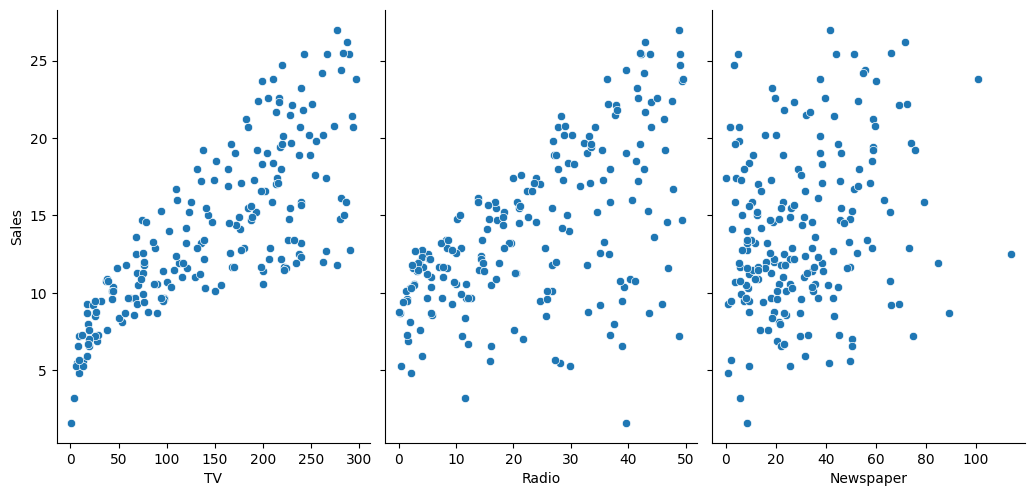

In [11]:
# Pairplot to see relationships
sns.pairplot(data, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', height=5, aspect=0.7, kind='scatter')
plt.show()


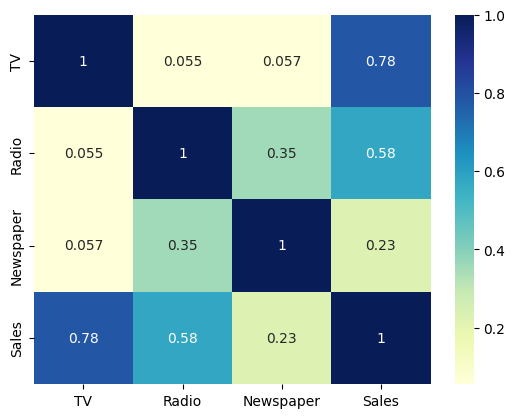

In [12]:
# Correlation matrix
sns.heatmap(data.corr(), annot=True, cmap="YlGnBu")
plt.show()

#Split the Data
Divide the dataset into training and testing sets.

In [13]:
# Define features (TV, Radio, Newspaper) and target variable (Sales)
X = data[['TV', 'Radio', 'Newspaper']]
y = data['Sales']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#Train the Model
Use a linear regression model to fit the training data.

In [14]:
# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

#Make Predictions

In [15]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 3.1740973539761033


#Evaluate the Model

 MSE value of approximately 3.17 indicates the average squared difference between actual and predicted sales.

In [16]:
# Print model coefficients
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

Intercept: 2.979067338122629
Coefficients: [0.04472952 0.18919505 0.00276111]


Intercept: The intercept is around 2.98, meaning that when all advertising expenditures are zero, the model predicts a base sales value of 2.98 units.

Coefficients:

*TV*: 0.0447

*Radio*: 0.1892

*Newspaper*: 0.0027

These coefficients imply that increases in advertising spending on TV and Radio have a positive impact on sales, with Radio being more influential than TV, while Newspaper has a much smaller effect.

In [17]:
# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 3.1740973539761033
R-squared: 0.899438024100912


Mean Squared Error (MSE):

Your MSE value of approximately 3.17 is consistent with the previous results. It represents the average squared difference between actual and predicted sales values. Lower MSE values indicate better performance, but the acceptability of this value depends on the scale of your sales data.




R-squared (R²):

Your R-squared value of 0.899 (or about 90%) suggests that approximately 90% of the variance in the Sales variable can be explained by the features TV, Radio, and Newspaper. This is a strong R-squared value, indicating a good fit for the model with this data.

#Visualize Results

Plot the actual vs. predicted values to visually assess model performance.

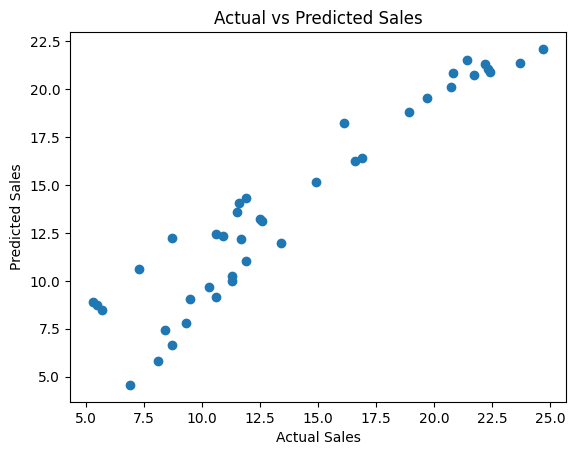

In [18]:
# Plot actual vs predicted sales
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.show()


#Feature Importance Analysis

Analyze the importance of each feature using the coefficients of the linear regression model.

In [19]:
# Creating a dataframe to show feature importance
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)


           Coefficient
TV            0.044730
Radio         0.189195
Newspaper     0.002761
